## DAPALL - MAPS
we are looking for MAPS files under the datatype: 

dapname = 'manga-'+plate+'-'+ifudesign+'-MAPS-SPX-MILESHC-MASTARHC2.fits.gz'

website: https://www.sdss.org/dr17/manga/manga-tutorials/dapall/

For parameters in the header: https://data.sdss.org/datamodel/files/MANGA_SPECTRO_ANALYSIS/DRPVER/DAPVER/dapall.html#hdu1

Let's start with a little tutorial found in the link above.

In [2]:
'''
First open the file and select those entries with successful 
analysis from the DAP using the HYB10-MILESHC-MASTARSSP method.https://data.sdss.org/sas/dr17/manga/spectro/analysis/v3_1_1/3.1.0/HYB10-MILESHC-MASTARHC2/7443/12703/manga-7443-12703-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz
'''

import numpy as np
from astropy.io import fits

dapall = fits.open('/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits')['HYB10-MILESHC-MASTARSSP'].data
indx = dapall['DAPDONE'] == 1
tbdata = dapall[indx]


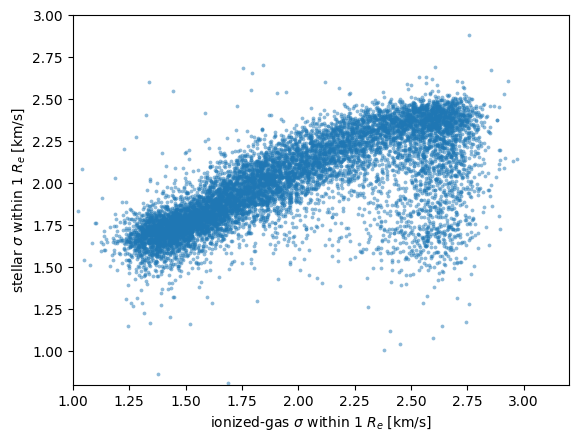

In [3]:
'''
We can use this file to make a simple plot of stellar vs. gas velocity 
dispersion within the effective radius, for example:
'''

import matplotlib.pyplot as plt
plt.scatter(np.ma.log10(tbdata['ha_gsigma_1re']),
               np.ma.log10(tbdata['stellar_sigma_1re']),
               alpha=0.5, marker='.', s=30, lw=0)
plt.xlim(1,3.2)
plt.ylim(0.8,3)
plt.xlabel(r'ionized-gas $\sigma$ within 1 $R_e$ [km/s]')
plt.ylabel(r'stellar $\sigma$ within 1 $R_e$ [km/s]')
plt.show()


OK, then let's find the plateifu in the catalog:

In [6]:
hdul = fits.open('/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits')['SPX-MILESHC-MASTARSSP'].data
plateifu = hdul['plateifu']
plate = hdul['plate']
ifu = hdul['ifudesign']
type(plateifu)

numpy.chararray

In [5]:
#Testing other datatype:(working)
with open('DAP_TEST.txt', 'w') as f:
    for i in range(len(hdul)):
        targeturl = 'https://data.sdss.org/sas/dr17/manga/spectro/analysis/v3_1_1/3.1.0/SPX-MILESHC-MASTARSSP/'+str(plate[i])+'/'+str(ifu[i])+'/manga-'+str(plateifu[i])+'-MAPS-SPX-MILESHC-MASTARSSP.fits.gz\n'
        f.write(targeturl)
        
#wget -i DAP_TEST.txt ./


## Verify is download files are complete

In [6]:
from os import walk
FOLDER = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Data'
filenames = next(walk(FOLDER), (None, None, []))[2]  # [] if no file

dl_folder = []
for i in range(len(hdul)):
        dl_name = 'manga-'+str(plateifu[i])+'-MAPS-SPX-MILESHC-MASTARSSP.fits'
        dl_folder.append(dl_name)

missing_file = []
for i in dl_folder:
    if i in filenames:
        pass
    else:
        missing_file.append(i)

## Download the missing files

In [7]:
test_str = 'manga-8479-6101-MAPS-SPX-MILESHC-MASTARSSP.fits'

#find the nth occurance to resolve the repetition of '-'
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

# getting index of substrings
idx1 = find_nth(test_str, '-', 1)
idx2 = find_nth(test_str, '-', 2)
idx3 = find_nth(test_str, '-', 3)
  
# length of substring 1 is added to
# get string from next character
ms_plate = test_str[idx1+1:idx2]
ms_ifu = test_str[idx2+1:idx3]
ms_plateifu = test_str[idx1+1:idx3]


In [8]:
#Testing other datatype:(working)
with open('DAP_MISS.txt', 'w') as f:
    for i in missing_file:
        # getting index of substrings
        idx1 = find_nth(i, '-', 1)
        idx2 = find_nth(i, '-', 2)
        idx3 = find_nth(i, '-', 3)

        # length of substring 1 is added to
        # get string from next character
        ms_plate = i[idx1+1:idx2]
        ms_ifu = i[idx2+1:idx3]
        ms_plateifu = i[idx1+1:idx3]
        ms_url = 'https://data.sdss.org/sas/dr17/manga/spectro/analysis/v3_1_1/3.1.0/SPX-MILESHC-MASTARSSP/'+ms_plate+'/'+ms_ifu+'/manga-'+ms_plateifu+'-MAPS-SPX-MILESHC-MASTARSSP.fits.gz\n'
        f.write(ms_url)
#wget -i DAP_MISS.txt ./

# Double checked: the missing files are 404 error. 